In [1]:
import pandas as pd
import time
import datetime
from numpy.random import randint
import numpy as np # for importing numpy
import matplotlib.pyplot as plt # for importing matplotlib
from IPython.display import display as disp

In [2]:
prev = datetime.datetime.now()
c_info = pd.read_csv("/Users/daniela.almendarez/Desktop/Proyecto_comparacion/Course_info.csv", index_col = 0)
now = datetime.datetime.now()
disp(c_info)
print(now - prev)

,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
id,,,,,,,,,,,,,,,,,,,
4715.0,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75,134.0,42.0,37.0,1268.0,2010-08-05T22:06:13Z,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/
1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.00,Debunking Myths of Entrepreneurship A startup ...,26474.0,4.50,709.0,112.0,9.0,88.0,2010-01-12T18:09:46Z,NaN,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/
5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change ...,1713.0,4.40,41.0,13.0,14.0,82.0,2010-10-13T18:07:17Z,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,/user/angelapoch/
7723.0,How to Train a Puppy,True,199.99,Train your puppy the right way with Dr. Ian Du...,4988.0,4.80,395.0,88.0,36.0,1511.0,2011-06-20T20:08:38Z,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,/user/ian-dunbar/
8157.0,Web Design from the Ground Up,True,159.99,Learn web design online: Everything you need t...,1266.0,4.75,38.0,12.0,38.0,569.0,2011-06-23T18:31:20Z,NaN,Design,Web Design,Web Design,English,/course/web-design-from-the-ground-up/,E Learning Lab,/user/edwin-ang-2/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4913954.0,Let's Speak Urdu - The Urdu Grammar,True,19.99,Urdu - Become fluent in this beautiful South A...,3.0,0.00,0.0,0.0,5.0,54.0,2022-10-05T11:31:36Z,2022-10-06,Teaching & Academics,Language Learning,Urdu Language,English,/course/lets-speak-urdu-the-grammar/,Jawaid Hameed,/user/jawaid-hameed/
4914146.0,CompTIA Linux+ (XKO-004/005 # 2 Practice Exam ...,True,49.99,Practice Latest exam questions with detailed e...,0.0,0.00,0.0,0.0,0.0,0.0,2022-10-05T12:29:23Z,2022-10-05,IT & Software,IT Certifications,CompTIA Linux+,English,/course/comptia-linux-xko-004005-2-practice-ex...,Jean-François d'Halluin,/user/badre-lini/
4914002.0,CISSP 4 full exams #1 : All CISSP domains - 12...,True,49.99,Practice Latest exam questions with detailed e...,0.0,0.00,0.0,0.0,0.0,0.0,2022-10-05T11:04:05Z,2022-10-05,IT & Software,IT Certifications,CISSP - Certified Information Systems Security...,English,/course/cissp-4-full-exams-1-all-cissp-domains...,Jean-François d'Halluin,/user/badre-lini/


0:00:01.230582


In [3]:
prev = datetime.datetime.now()
c_info['num_subscribers'] = c_info['num_subscribers'].astype('int64')
c_info['num_reviews'] = c_info['num_reviews'].astype('int64')
c_info['num_comments'] = c_info['num_comments'].astype('int64')
c_info['num_lectures'] = c_info['num_lectures'].astype('int64')
c_info['num_reviews'] = c_info['num_reviews'].astype('int64')
c_info['published_time'] = pd.to_datetime(c_info['published_time'])
c_info['last_update_date'] = pd.to_datetime(c_info['last_update_date'])
now = datetime.datetime.now()
print(now - prev)

0:00:00.257717


In [4]:
c_info.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 209734 entries, 4715.0 to 4914054.0
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   title               209734 non-null  object             
 1   is_paid             209734 non-null  bool               
 2   price               209734 non-null  float64            
 3   headline            209707 non-null  object             
 4   num_subscribers     209734 non-null  int64              
 5   avg_rating          209734 non-null  float64            
 6   num_reviews         209734 non-null  int64              
 7   num_comments        209734 non-null  int64              
 8   num_lectures        209734 non-null  int64              
 9   content_length_min  209734 non-null  float64            
 10  published_time      209734 non-null  datetime64[ns, UTC]
 11  last_update_date    209597 non-null  datetime64[ns]     
 12  catego

### Creación de una nueva columna con los nombres de usuario y de curso extraidos de los url

In [4]:
prev = datetime.datetime.now()
c_info.insert(18,'instructor_username',c_info['instructor_url'].str[6:-2])
c_info.insert(17,'course_username',c_info['course_url'].str[8:-1])
c_info.head()
print(datetime.datetime.now() - prev)

0:00:00.096426


### Muestra el curso más antiguo y el más reciente con su fecha de publicación

In [5]:
prev = datetime.datetime.now()
old_date=c_info['published_time'].min()
recent_date=c_info['published_time'].max()
dates=c_info.loc[c_info['published_time'].isin([old_date,recent_date])]
#dates.filter(items=['published_time','last_update_date','title']).head()
disp(dates.filter(items=['published_time','last_update_date','title']))
print(datetime.datetime.now() - prev)

,published_time,last_update_date,title
id,,,
1769.0,2010-01-12 18:09:46+00:00,NaT,The Lean Startup Talk at Stanford E-Corner
4843332.0,2022-10-05 17:04:08+00:00,2022-10-03,Manual para la Perdida de Masa Grasa


0:00:00.110205


### Cuenta el número de cursos por lenguaje

In [6]:
prev = datetime.datetime.now()
courses_per_language=c_info.groupby(by='language',sort=False)['language'].count()
with pd.option_context('display.max_rows', None,):
   print(courses_per_language)
print(datetime.datetime.now() - prev)

language
English                123921
Spanish                 17428
Turkish                  8100
Simplified Chinese        995
Arabic                   5197
Portuguese              18471
Italian                  3637
Serbian                    23
Afrikaans                  36
French                   5465
Slovak                      7
Japanese                 7006
Hebrew                    203
Traditional Chinese      1014
Estonian                   10
German                   6101
Russian                  2686
Finnish                    13
Dutch                     227
Hungarian                 116
Swedish                    20
Norwegian                  20
Thai                      338
Bulgarian                  27
Polish                   1530
Urdu                      530
Croatian                   33
Marathi                    70
Danish                     10
Greek                     105
Hindi                    1758
Indonesian               1580
Azeri                      82
V

### Cursos con mayor número de suscriptores

In [7]:
prev = datetime.datetime.now()
c_info.filter(items=['title', 'instructor_name', 'published_time', 'num_subscribers']).sort_values('num_subscribers',ascending=False).head(10)
print(datetime.datetime.now() - prev)

0:00:00.057398


### Número de cursos con 0 y 1 subscriptor

In [11]:
prev = datetime.datetime.now()
cero_subs=c_info.filter(items=['num_subscribers']).loc[c_info['num_subscribers']==0].count()
one_subs=c_info.filter(items=['num_subscribers']).loc[c_info['num_subscribers']==1].count()
print('Sin subscriptores:',cero_subs[0])
print('Un subscriptor:',one_subs[0])
print(datetime.datetime.now() - prev)

Sin subscriptores: 9456
Un subscriptor: 5698
0:00:00.009053


In [9]:
prev = datetime.datetime.now()
cero_subs2=c_info[c_info['num_subscribers']==0].count()
one_subs2=c_info[c_info['num_subscribers']==1].count()
print('Sin subscriptores:',cero_subs[0])
print('Un subscriptor:',one_subs[0])

print(datetime.datetime.now() - prev)

Sin subscriptores: 9456
Un subscriptor: 5698
0:00:00.043632


### Creación de una función udf para extraer los nombres de pila de los instructores

In [12]:
prev = datetime.datetime.now()
def getFirstName(name):
	ans = ""
	if name is None:
		return "None"
	sname = name.split()
	prefix = ['mr.','mrs.','ms.','dr.','prof.','sr.','jr.','.',',','mr','mrs','ms','dr','prof','sr','jr']
	for i in range(len(sname)):
		sname[i] = sname[i].lower()
	if len(sname) > 0 and sname[0] not in prefix:
		ans = sname[0]
	elif len(sname) > 1 and sname[1] not in prefix:
		ans = sname[1]
	elif len(sname) > 2 and sname[2] not in prefix:
		ans = sname[2]
	ans =ans.capitalize()
	return ans
print(datetime.datetime.now() - prev)

0:00:00


In [13]:
prev = datetime.datetime.now()
instructors_df = c_info.groupby(['instructor_username','instructor_name']).agg({'num_subscribers':'mean','avg_rating':'mean', 'price':'mean'})
instructors_df.reset_index(inplace = True)
instructors_df = instructors_df.set_index('instructor_username')
instructors_df.head()
print(datetime.datetime.now() - prev)

0:00:00.218829


In [14]:
prev = datetime.datetime.now()
instructors_df['instructor_name']= instructors_df['instructor_name'].map(getFirstName)
instructors_df.head()
print(datetime.datetime.now() - prev)

0:00:00.100438


### A traves de la librería gender_guesser adivina el género de los instructores

In [16]:
import gender_guesser.detector as gender
gd = gender.Detector()

In [17]:
prev = datetime.datetime.now()
instructors_df['gender'] = instructors_df['instructor_name'].map(lambda x: gd.get_gender(x.capitalize()))
instructors_df.head()
print(datetime.datetime.now() - prev)

0:00:00.179415


In [18]:
prev = datetime.datetime.now()
known_instructors = instructors_df[instructors_df['gender'] != 'unknown']
known_instructors.head()
print(datetime.datetime.now() - prev)

0:00:00.018595


### Obtiene el número promedio de subscriptores por género y lo grafica

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
prev = datetime.datetime.now()
avg_num_subscribers_per_gender = known_instructors.groupby('gender').agg({'num_subscribers':'mean'})
avg_num_subscribers_per_gender.head()
print(datetime.datetime.now() - prev)

0:00:00.006151


0:00:00.041121


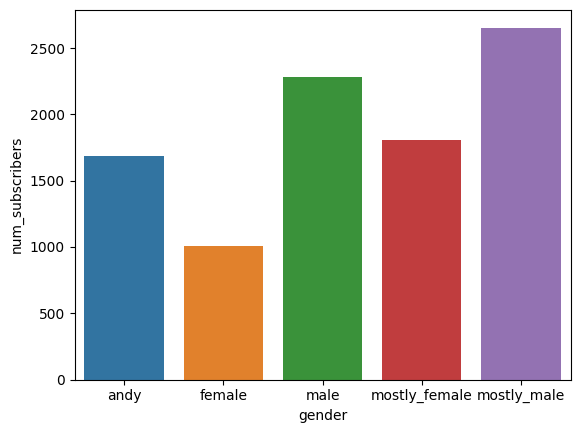

In [21]:
prev = datetime.datetime.now()
sns.barplot(x = avg_num_subscribers_per_gender.index, y = 'num_subscribers', data = avg_num_subscribers_per_gender)
print(datetime.datetime.now() - prev)

### Obtiene el raiting promedio por género y lo grafica

In [22]:
prev = datetime.datetime.now()
avg_rating_per_gender = known_instructors.groupby('gender').agg({'avg_rating':'mean'})
avg_rating_per_gender.head()
print(datetime.datetime.now() - prev)

0:00:00.004982


0:00:00.024242


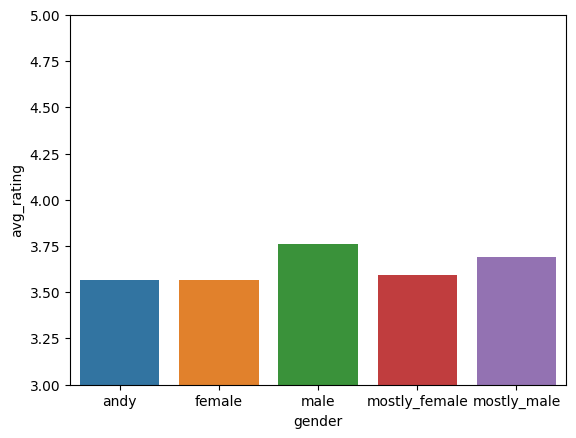

In [23]:
prev = datetime.datetime.now()
plt.ylim(3,5)
sns.barplot(x = avg_rating_per_gender.index, y = 'avg_rating', data = avg_rating_per_gender)
print(datetime.datetime.now() - prev)